<a href="https://colab.research.google.com/github/DarkanCC/TestIII/blob/master/Test_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Importamos los datos
data = pd.read_csv("/content/sample_data/usuarios_twitter.csv", sep = ",")

# Se definen las entradas y la salida
X = data.drop('categoria', axis = 1)
Y = data[['categoria']]

# Selecciona las características a utilizar: "ag", "ne", "Wordcount"
features = X.iloc[:, [4, 5, 6]]

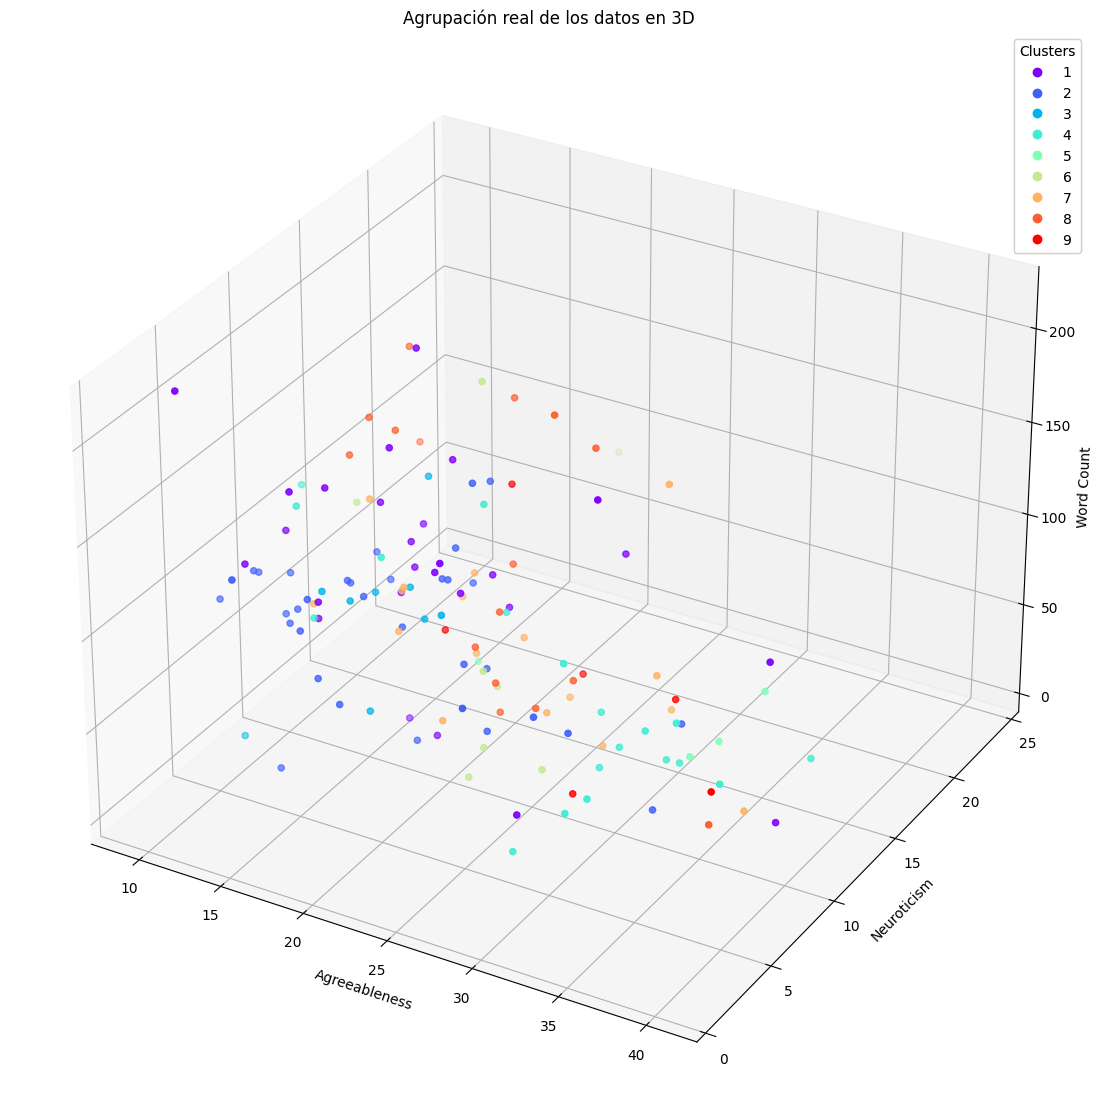

In [4]:
# Mostramos la agrupación real de los datos en 3D
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(features["ag"], features["ne"], features["wordcount"], c=np.ravel(Y), cmap='rainbow')

ax.set_xlabel('Agreeableness')
ax.set_ylabel('Neuroticism')
ax.set_zlabel('Word Count')
ax.set_title('Agrupación real de los datos en 3D')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

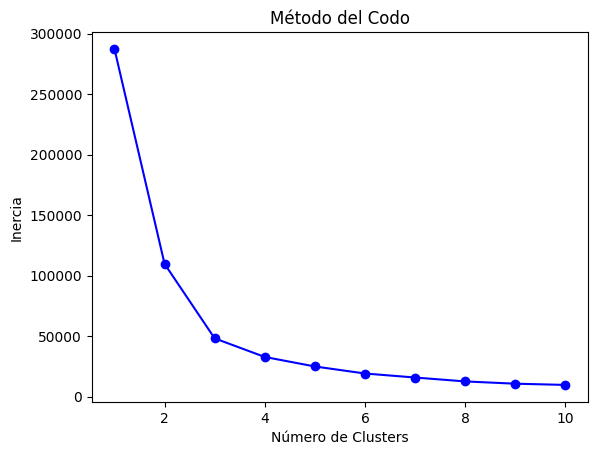

In [145]:
# Aplicamos el método del codo para definir el mejor número de clusters
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [146]:
# Aplicamos coeficiente de Silhouette para asegurar el número de clusters
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"El número óptimo de clusters es: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

El número óptimo de clusters es: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **¿Cuál es el número adecuado de clusters?**
***R/*** De acuerdo al método del codo, al coeficiente de Silhouette y considerando las características seleccionadas, el número más adecuado de clusters 3. Si analizamos la gráfica del codo, vemos que luego de los 3 clusters la suma de las distancias al cuadrado de los puntos al centro de su cluster no disminuye de manera significativa.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


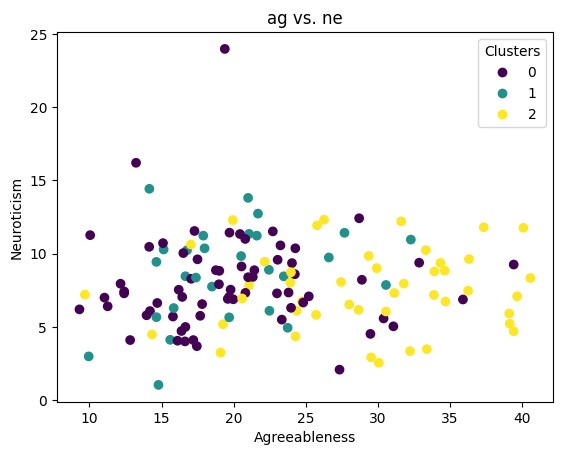

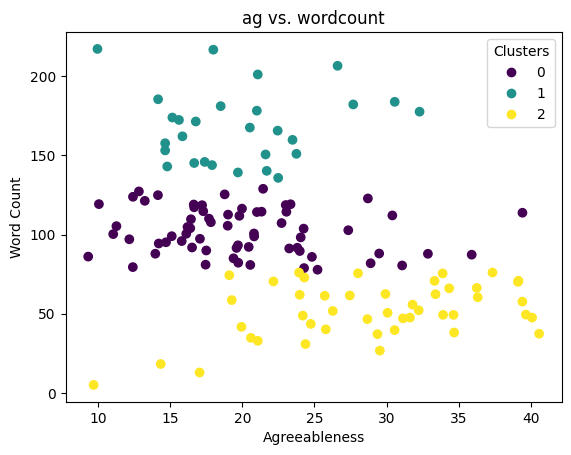

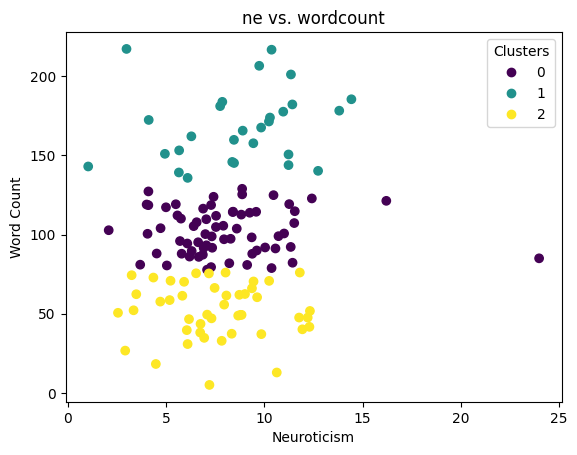

In [7]:
# Implementamos el modelo
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=1000)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

# Grupos "ag" vs "ne"
scatter = plt.scatter(features["ag"], features["ne"], c=cluster_labels)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel('Agreeableness')
plt.ylabel('Neuroticism')
plt.title("ag vs. ne")
plt.show()

# Grupos "ag" vs "wordcount"
scatter = plt.scatter(features["ag"], features["wordcount"], c=cluster_labels)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel('Agreeableness')
plt.ylabel('Word Count')
plt.title("ag vs. wordcount")
plt.show()

# Grupos "ne" vs "wordcount"
scatter = plt.scatter(features["ne"], features["wordcount"], c=cluster_labels)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel('Neuroticism')
plt.ylabel('Word Count')
plt.title("ne vs. wordcount")
plt.show()

# **¿Qué interpretación le da a los grupos que se han formado?**
***R/*** De acuerdo a la gráfica de "ag" vs "ne", podemos deducir que las personas con un alto grado de empatía y con un temperamento fuerte tienden a clasificarse en el cluster 2, mientras que los clusters 0 y 1 son muy similares, tendiendo a confundirse, clasificando en ellos personas que tengan poca empatía con los demás y un temperamento menos fuerte. Debido a que la mayoría de las muestras se encuentran clasificadas por debajo de un mismo punto de neuroticismo, esta característica no es tan relevante.

Respecto a las otras 2 gráficas podemos deducir que el hecho de que una persona escriba poco o mucho en twitter no es relevante a la hora de clasificar los en un cluster u otro, por lo que solo se tienen en cuenta las otras 2 caracteristicas: Si es empático(Agreeableness) y si es nervioso o neurótico(Neuroticism).

In [6]:
# Genera datos
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.2,
    shuffle=True,
    random_state=0
)

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se definen los hiperparámetros a buscar
param_grid = {
    'hidden_layer_sizes': [(10, 10), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtenemos la mejor configuración
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Entrenamos con la mejor configuración
best_mlp = MLPClassifier(max_iter=1000, random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

# Evaluar la RNA en el conjunto de prueba
y_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy en entrenamiento:", best_accuracy)
print("Accuracy en el conjunto de prueba:", test_accuracy)

Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10)}
Mejor accuracy en entrenamiento: 0.8725000000000002
Accuracy en el conjunto de prueba: 0.89


# **¿Cuál es la configuración de la RNA que te generó mejor accuracy?**
***R/*** Para hallar la mejor configuración, se configuraron 3 hiperparámetros: El tamaño de la capa oculta, la función de activación y alpha.
Se halló que la configuración con mayor accuracy fue {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10)}